In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 한글 깨짐 방지
mpl.rcParams['font.family'].insert(0, 'Malgun Gothic')

#### 데이터 적재

In [9]:
afsnt = pd.read_csv('AFSNT2.csv', encoding='CP949', engine='python')
afsnt.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


In [10]:
afsnt.DRR = afsnt.DRR.map({'A01':'안개','A02':'강설','A03':'강우','A04':'태풍','A05':'강풍','A06':'상층풍',
                           'A07':'운고','A08':'기상-황사','A09':'기상-항로','A10':'기상-뇌우','A99':'기상-기타',
                           'B01':'계류장혼잡','B02':'사고','B03':'활주로사정','B04':'행사',
                           'B05':'항행시설고장', 'B06':'공항폐쇄','B07':'이륙대기','B08':'Curfew',
                           'C01':'A/C정비','C02':'A/C접속','C03':'승객접속','C04':'여객처리','C05':'지상조업',
                          'C06':'SKD변경','C07':'항공기부족','C08':'연료재급유','C09':'환자','C10':'제방빙작업',
                          'C11':'보안검색','C12':'조종사자격','C13':'승무원휴식','C14':'승무원연결','C15':'화물탑재',
                          'C16':'화물연결','C17':'화물수요부족','D01':'항로혼잡','D02':'영공통과불허','D03':'관계',
                          'Z01':'복합원인','Z99':'기타',})

In [11]:
afsnt.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,A/C접속,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


#### datetime type으로 날짜변수 생성

In [12]:
ymd = afsnt.SDT_YY.apply(str) + '-' \
        + afsnt.SDT_MM.apply(str) + '-' \
        + afsnt.SDT_DD.apply(str)

In [13]:
afsnt['YMD'] = pd.to_datetime(ymd)

In [14]:
afsnt.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN,2017-01-01
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,2017-01-01
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,2017-01-01
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,A/C접속,N,NaN,2017-01-01
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN,2017-01-01


### 요일별

In [15]:
dow = afsnt.pivot_table(index='SDT_DY', columns='DLY', aggfunc='count', 
                       values='AOD')
dow

DLY,N,Y
SDT_DY,,
금,121849,20993
목,122067,17726
수,123608,15712
월,122926,18540
일,126872,17001
토,127370,13867
화,124080,15098


In [16]:
# 컬럼 재배열
dow = dow.loc[['월','화','수','목','금','토','일']]
dow

DLY,N,Y
SDT_DY,,
월,122926,18540
화,124080,15098
수,123608,15712
목,122067,17726
금,121849,20993
토,127370,13867
일,126872,17001


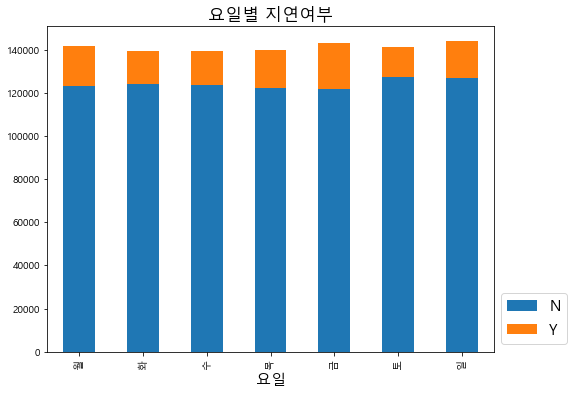

In [17]:
dow.plot(kind='bar',
        stacked=True,
        figsize=(8,6))
plt.title('요일별 지연여부', fontsize=17)
plt.xlabel('요일', fontsize=15)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0), fontsize=15)

- > 거의 비슷. 그나마 금요일이 지연여부 높음.

### 월별

#### 2019년도는 7~12월 data가 없으므로 제외한 후 plotting

In [21]:
month = afsnt[afsnt.SDT_YY!=2019].pivot_table(index='SDT_MM', columns='DLY', aggfunc='count', values='AOD')
month

DLY,N,Y
SDT_MM,,
1,54565,9896
2,49786,9011
3,60136,5770
4,56259,10174
5,60707,8554
6,58894,8002
7,60527,7954
8,59404,9267
9,59533,7711


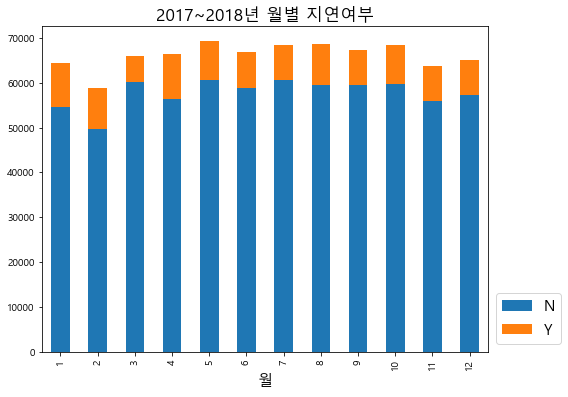

In [22]:
month.plot(kind='bar',
        stacked=True,
        figsize=(8,6))
plt.title('2017~2018년 월별 지연여부', fontsize=17)
plt.xlabel('월', fontsize=15)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0), fontsize=15)

In [23]:
# 월별 지연사유
mm_drr = afsnt.pivot_table(index=['DRR'], columns=['SDT_MM'], aggfunc='count', 
                   values='AOD')

In [24]:
# 7월 기준 지연사유
mm_drr.sort_values(by=7, ascending=False)

SDT_MM,1,2,3,4,5,6,7,8,9,10,11,12
DRR,,,,,,,,,,,,
A/C접속,11523.0,10844.0,7599.0,12292.0,10720.0,10247.0,7233.0,8540.0,7067.0,8016.0,6903.0,6754.0
A/C정비,173.0,200.0,184.0,194.0,156.0,237.0,180.0,195.0,134.0,113.0,119.0,146.0
항로혼잡,61.0,85.0,37.0,73.0,139.0,135.0,101.0,89.0,100.0,70.0,28.0,32.0
승무원연결,88.0,101.0,92.0,91.0,91.0,99.0,85.0,71.0,43.0,42.0,31.0,39.0
승객접속,147.0,114.0,70.0,57.0,57.0,62.0,77.0,70.0,51.0,66.0,43.0,93.0
기상-기타,7.0,5.0,3.0,4.0,13.0,8.0,56.0,11.0,7.0,5.0,14.0,6.0
기타,60.0,66.0,53.0,91.0,65.0,56.0,53.0,71.0,48.0,49.0,25.0,27.0
강풍,8.0,140.0,75.0,143.0,88.0,43.0,25.0,18.0,2.0,35.0,18.0,1.0
여객처리,25.0,29.0,13.0,52.0,28.0,42.0,24.0,26.0,22.0,13.0,18.0,23.0


## : 매월 A/C접속이 압도적으로 큰 지연사유
### A/C접속 제외하고 상위7개 지연사유 plotting

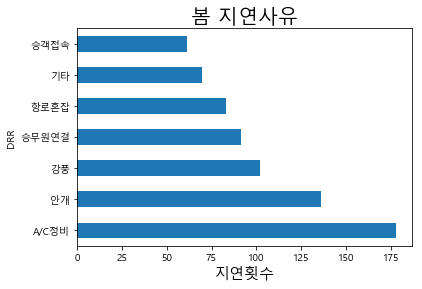

In [25]:
# 3, 4, 5월: 봄
((mm_drr[3]+mm_drr[4]+mm_drr[5])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('봄 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

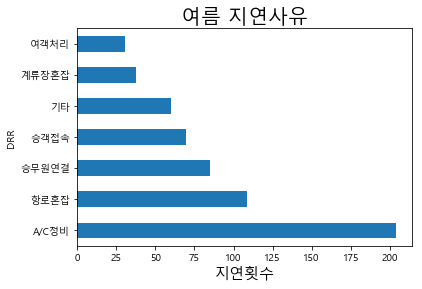

In [26]:
# 6, 7, 8월: 여름
((mm_drr[6]+mm_drr[7]+mm_drr[8])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('여름 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

- > 여름은 기상으로 인한 지연율이 생각보다 그리 크지 않음.

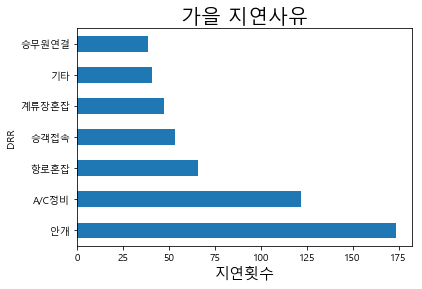

In [27]:
# 9, 10, 11: 가을
((mm_drr[9]+mm_drr[10]+mm_drr[11])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('가을 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

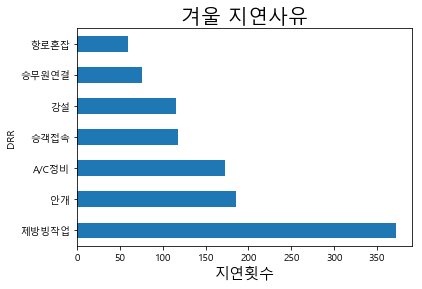

In [28]:
# 12, 1, 2: 겨울
((mm_drr[12]+mm_drr[1]+mm_drr[2])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('겨울 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

### 시간별
- 범주화 하기 전에 시간대별 운항수 plotting

In [29]:
afsnt.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN,2017-01-01
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,2017-01-01
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,2017-01-01
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,A/C접속,N,NaN,2017-01-01
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN,2017-01-01


In [30]:
stt=afsnt.STT

In [31]:
hour=[]
for k in stt:
    s=k.split(':')
    hour.append(s[0])

In [32]:
df = pd.DataFrame(hour)

In [33]:
df.columns=['h']

In [34]:
df.h.value_counts().sort_index()

0       103
1        17
10    64972
11    65522
12    59669
13    60219
14    65257
15    64536
16    67543
17    69960
18    70202
19    71119
2         1
20    61210
21    41755
22    18680
23      250
5        24
6     20154
7     49236
8     65559
9     71721
Name: h, dtype: int64

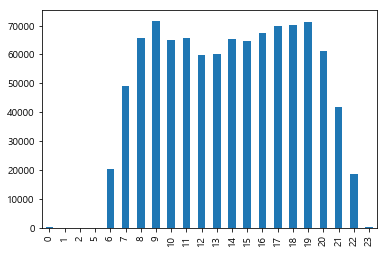

In [35]:
df.h.value_counts()[['0','1','2','5','6','7','8','9','10',
                    '11','12','13','14','15','16','17','18','19','20','21','22','23']].plot(kind='bar')

### 시간별 

In [36]:
# 현준 시간 범주화 참고
def categorization_time(stt):
    t_list=[]
    for i in range(len(stt)):
        time = int(stt[i].split(':')[0])*60 + int(stt[i].split(':')[1])
        if time >= 300 and time < 480:
            t_list.append('5-8시')
        elif time >=480 and time < 660:
            t_list.append('8-11시')
        elif time >=660 and time < 840:
            t_list.append('11-14시')
        elif time >=840 and time < 1020:
            t_list.append('14-17시')
        elif time >=1020 and time < 1200:
            t_list.append('17-20시')
        elif time >=1200 and time < 1380:
            t_list.append('20-23시')
        elif time >=1380 or time < 300:
            t_list.append('23-5시')
    return t_list

t_list = categorization_time(afsnt.STT)

In [37]:
afsnt['cat_stt'] = t_list

In [38]:
afsnt.head(10)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN,2017-01-01,8-11시
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,2017-01-01,8-11시
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,2017-01-01,11-14시
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,A/C접속,N,NaN,2017-01-01,11-14시
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN,2017-01-01,14-17시
5,2017,1,1,일,ARP3,ARP6,J,J1959,SEw3NTk5,D,N,16:45,17:21,Y,A/C접속,N,NaN,2017-01-01,14-17시
6,2017,1,1,일,ARP3,ARP6,J,J1960,SEw3NTk5,A,N,19:30,19:43,N,NaN,N,NaN,2017-01-01,17-20시
7,2017,1,1,일,ARP3,ARP6,J,J1961,SEw3NTk5,D,N,20:35,20:52,N,NaN,N,NaN,2017-01-01,20-23시
8,2017,1,1,일,ARP2,ARP3,J,J1015,SEw3NzA2,A,N,17:05,17:03,N,NaN,N,NaN,2017-01-01,17-20시
9,2017,1,1,일,ARP1,ARP3,J,J1242,SEw3NzA2,D,N,20:25,20:36,N,NaN,N,NaN,2017-01-01,20-23시


In [39]:
afsnt.pivot_table(index='cat_stt', columns='DLY', aggfunc='count', values='AOD')

DLY,N,Y
cat_stt,,
11-14시,163072,22338
14-17시,167234,30102
17-20시,179709,31572
20-23시,106465,15180
23-5시,343,28
5-8시,66093,3321
8-11시,185856,16396


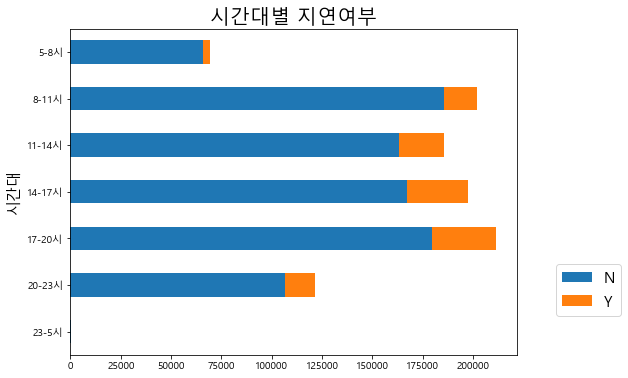

In [40]:
time_dly = afsnt.pivot_table(index='cat_stt', columns='DLY', aggfunc='count', values='AOD')
time_dly = time_dly.loc[['23-5시', '20-23시', '17-20시', '14-17시', '11-14시', '8-11시', '5-8시']]
time_dly.plot(kind='barh',
               stacked=True,
               figsize=(8, 6))
plt.title('시간대별 지연여부', fontsize=20)
plt.ylabel('시간대', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.3), fontsize=15)

### 항공사별

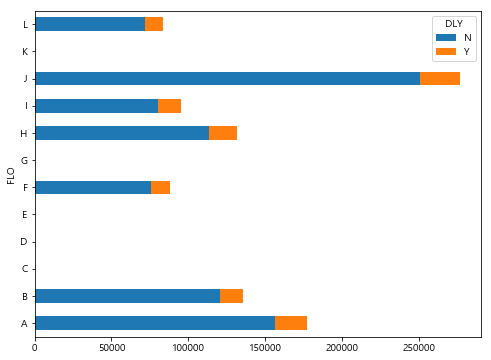

In [41]:
afsnt.pivot_table(index='FLO', columns='DLY', aggfunc='count', values='AOD').plot(kind='barh',
                                                                                 stacked=True,
                                                                                 figsize=(8, 6))

In [42]:
# 항공사별 지연사유
afsnt.pivot_table(index=['DRR'], columns=['FLO'], aggfunc='count', 
                   values='AOD').sort_values(by='J', ascending=False)

FLO,A,B,F,H,I,J,L
DRR,,,,,,,
A/C접속,19224.0,13042.0,11634.0,16968.0,14066.0,21541.0,11263.0
A/C정비,364.0,293.0,192.0,196.0,136.0,747.0,103.0
승객접속,209.0,8.0,3.0,13.0,3.0,669.0,2.0
항로혼잡,224.0,73.0,42.0,108.0,14.0,456.0,33.0
제방빙작업,242.0,178.0,88.0,129.0,62.0,433.0,95.0
안개,245.0,157.0,167.0,245.0,156.0,425.0,129.0
기타,79.0,78.0,42.0,64.0,49.0,341.0,11.0
강풍,98.0,46.0,48.0,114.0,40.0,211.0,39.0
승무원연결,54.0,355.0,122.0,76.0,44.0,196.0,26.0


## 항공편명(FLT) 뒤에 문자가 더 붙는 편명

In [44]:
add_cha = afsnt[afsnt.FLT.apply(len)>5]
add_cha

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
4675,2017,1,16,월,ARP2,ARP15,J,J1144F,SEw4MDI1,A,Y,12:35,13:04,N,NaN,N,NaN,2017-01-16,11-14시
9172,2017,1,31,화,ARP2,ARP15,J,J1144F,SEw3NTMy,A,Y,12:35,12:35,N,NaN,N,NaN,2017-01-31,11-14시
12747,2017,2,12,일,ARP1,ARP15,J,J1145F,SEw3NzI2,A,Y,20:45,20:29,N,NaN,N,NaN,2017-02-12,20-23시
12748,2017,2,12,일,ARP2,ARP15,J,J1144F,SEw3Nzgy,A,Y,8:35,9:18,Y,제방빙작업,N,NaN,2017-02-12,8-11시
13039,2017,2,13,월,ARP1,ARP15,J,J1124M,SEw3NzA0,D,Y,16:00,16:39,Y,승무원연결,N,NaN,2017-02-13,14-17시
13332,2017,2,14,화,ARP1,ARP15,J,J1145F,NaN,A,Y,20:45,0:00,N,NaN,Y,C01,2017-02-14,20-23시
14835,2017,2,19,일,ARP1,ARP15,J,J1145F,SEw3NzI3,A,Y,20:15,19:54,N,NaN,N,NaN,2017-02-19,20-23시
16444,2017,2,24,금,ARP1,ARP2,J,J1144F,SEw3NTM0,D,Y,6:55,7:33,Y,승무원연결,N,NaN,2017-02-24,5-8시
18753,2017,3,4,토,ARP1,ARP15,J,J1125T,SEw4MDgx,A,Y,11:00,10:47,N,NaN,N,NaN,2017-03-04,11-14시
18754,2017,3,4,토,ARP1,ARP15,J,J1126T,SEw4MDgx,D,Y,11:30,12:17,Y,승무원연결,N,NaN,2017-03-04,11-14시


## 부정기편이라 붙은 것은 아님
- 부정기편 아닌 data 23개 존재

In [45]:
afsnt[afsnt.FLT.apply(len)>5].IRR.value_counts()

Y    3259
N      23
Name: IRR, dtype: int64

In [46]:
# 부정기편 아닌데 뒤에 문자가 붙은 항공편도 있음.
afsnt[(afsnt.IRR=='N') & (afsnt.FLT.apply(len)>5)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
186158,2017,8,12,토,ARP1,ARP3,F,F1262F,SEw4MDIy,A,N,22:55,22:39,N,NaN,N,NaN,2017-08-12,20-23시
186200,2017,8,12,토,ARP3,ARP1,F,F1262F,SEw4MDIy,D,N,21:50,21:57,N,NaN,N,NaN,2017-08-12,20-23시
186568,2017,8,16,수,ARP6,ARP3,F,F1704A,SEw4MDI4,A,N,0:15,0:46,Y,A/C접속,N,NaN,2017-08-16,23-5시
196309,2017,11,18,토,ARP6,ARP3,F,F1706A,SEw4MDIy,A,N,0:05,0:03,N,NaN,N,NaN,2017-11-18,23-5시
261499,2017,10,28,토,ARP1,ARP3,A,A1890A,SEw4MjM2,A,N,22:35,22:46,N,NaN,N,NaN,2017-10-28,20-23시
261568,2017,10,28,토,ARP3,ARP1,A,A1890A,SEw4MjM2,D,N,21:35,22:02,N,NaN,N,NaN,2017-10-28,20-23시
354149,2017,9,30,토,ARP6,ARP3,I,I1560A,SEw3NTY0,A,N,0:06,1:08,Y,A/C접속,N,NaN,2017-09-30,23-5시
354341,2017,10,2,월,ARP3,ARP6,I,I1560A,SEw3NTY3,D,N,20:30,20:48,N,NaN,N,NaN,2017-10-02,20-23시
354344,2017,10,2,월,ARP3,ARP6,I,I1559A,SEw4MDE3,A,N,20:25,20:26,N,NaN,N,NaN,2017-10-02,20-23시
354372,2017,10,2,월,ARP6,ARP3,I,I1560A,SEw3NTY3,A,N,21:30,21:36,N,NaN,N,NaN,2017-10-02,20-23시


In [47]:
# 뒤에 붙는 문자 종류 찾기
add = afsnt[afsnt.FLT.apply(len)>5].FLT
a=[]
for i in add:
    a.append(i[5])

a = pd.DataFrame(a)
a.columns=['dist']
a.dist.value_counts()

F    2118
A     923
T     173
M      34
C      24
B       5
D       3
Y       2
Name: dist, dtype: int64

In [48]:
# 뒤에 Y붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='Y' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
605129,2018,2,5,월,ARP15,ARP3,A,A1494Y,NaN,A,Y,0:15,0:00,N,NaN,Y,A02,2018-02-05,23-5시
605199,2018,2,5,월,ARP3,ARP15,A,A1494Y,NaN,D,Y,22:30,0:00,N,NaN,Y,A02,2018-02-05,20-23시


In [49]:
# 뒤에 D붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='D' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
109483,2017,12,24,일,ARP1,ARP15,J,J1077D,SEw4MDgz,D,Y,6:30,6:50,N,NaN,N,NaN,2017-12-24,5-8시
324999,2017,7,11,화,ARP2,ARP6,K,K1606D,QjUwMDE2,A,Y,18:00,17:52,N,NaN,N,NaN,2017-07-11,17-20시
325000,2017,7,11,화,ARP6,ARP2,K,K1606D,QjUwMDE2,D,Y,17:00,17:17,N,NaN,N,NaN,2017-07-11,17-20시


In [50]:
# 뒤에 B붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='B' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
877613,2019,1,24,목,ARP1,ARP3,F,F1284B,SEw4MDk3,A,Y,15:50,16:31,Y,A/C접속,N,NaN,2019-01-24,14-17시
883548,2019,3,31,일,ARP12,ARP15,F,F1691B,SEw4MjMx,A,Y,10:10,10:16,N,NaN,N,NaN,2019-03-31,8-11시
884014,2019,4,5,금,ARP12,ARP1,F,F1692B,SEw4MjMx,D,Y,10:00,10:10,N,NaN,N,NaN,2019-04-05,8-11시
884015,2019,4,5,금,ARP1,ARP12,F,F1692B,SEw4MjMx,A,Y,10:40,10:57,N,NaN,N,NaN,2019-04-05,8-11시
911404,2019,4,15,월,ARP8,ARP15,A,A1858B,SEw3Nzcy,D,Y,15:00,15:49,Y,A/C정비,N,NaN,2019-04-15,14-17시


In [51]:
# 뒤에 C붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='C' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
226225,2017,5,8,월,ARP1,ARP15,A,A1802C,SEw4MDc4,D,Y,8:55,9:41,Y,A/C접속,N,NaN,2017-05-08,8-11시
226226,2017,5,8,월,ARP3,ARP15,A,A1806C,SEw4MDc4,D,Y,18:35,18:35,N,NaN,N,NaN,2017-05-08,17-20시
226227,2017,5,8,월,ARP3,ARP15,A,A1805C,SEw4MDc4,A,Y,16:20,17:24,Y,A/C접속,N,NaN,2017-05-08,14-17시
226228,2017,5,8,월,ARP1,ARP15,A,A1803C,SEw4MDc4,A,Y,12:15,13:05,Y,A/C접속,N,NaN,2017-05-08,11-14시
226229,2017,5,8,월,ARP3,ARP15,A,A1808C,SEw4MDc4,D,Y,21:45,22:27,Y,A/C접속,N,NaN,2017-05-08,20-23시
226230,2017,5,8,월,ARP1,ARP15,A,A1801C,SEw4MDc4,A,Y,8:10,8:00,N,NaN,N,NaN,2017-05-08,8-11시
226231,2017,5,8,월,ARP1,ARP15,A,A1804C,SEw4MDc4,D,Y,13:00,14:27,Y,A/C접속,N,NaN,2017-05-08,11-14시
226232,2017,5,8,월,ARP3,ARP15,A,A1807C,SEw4MDc4,A,Y,21:15,21:33,N,NaN,N,NaN,2017-05-08,20-23시
226428,2017,5,9,화,ARP3,ARP15,A,A1803C,SEw4MDc4,A,Y,12:25,13:17,Y,A/C접속,N,NaN,2017-05-09,11-14시
226429,2017,5,9,화,ARP3,ARP15,A,A1802C,SEw4MDc4,D,Y,9:35,10:06,Y,A/C접속,N,NaN,2017-05-09,8-11시


In [52]:
# 뒤에 M붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='M' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
13039,2017,2,13,월,ARP1,ARP15,J,J1124M,SEw3NzA0,D,Y,16:00,16:39,Y,승무원연결,N,NaN,2017-02-13,14-17시
55106,2017,6,29,목,ARP2,ARP15,J,J1125M,SEw3NTg1,D,Y,11:35,11:39,N,NaN,N,NaN,2017-06-29,11-14시
59754,2017,7,14,금,ARP2,ARP1,J,J1124M,SEw4MjI0,A,Y,18:35,18:49,N,NaN,N,NaN,2017-07-14,17-20시
59841,2017,7,14,금,ARP1,ARP2,J,J1124M,SEw4MjI0,D,Y,15:40,16:30,Y,A/C접속,N,NaN,2017-07-14,14-17시
64715,2017,7,30,일,ARP1,ARP15,J,J1124M,SEw4MjIz,D,Y,15:55,16:07,N,NaN,N,NaN,2017-07-30,14-17시
77692,2017,9,10,일,ARP2,ARP15,J,J1125M,SEw3NTg0,D,Y,16:00,16:08,N,NaN,N,NaN,2017-09-10,14-17시
79201,2017,9,15,금,ARP1,ARP1,J,J1124M,SEw3NTY4,A,Y,12:30,12:17,N,NaN,N,NaN,2017-09-15,11-14시
79202,2017,9,15,금,ARP1,ARP1,J,J1124M,SEw3NTY4,D,Y,10:00,10:47,Y,항로혼잡,N,NaN,2017-09-15,8-11시
103532,2017,12,4,월,ARP2,ARP1,J,J1125M,SEw4MjI1,D,Y,18:00,16:47,N,NaN,N,NaN,2017-12-04,17-20시
103611,2017,12,4,월,ARP1,ARP2,J,J1125M,SEw4MjI1,A,Y,19:00,19:06,N,NaN,N,NaN,2017-12-04,17-20시


In [53]:
# 뒤에 T붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='T' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
18753,2017,3,4,토,ARP1,ARP15,J,J1125T,SEw4MDgx,A,Y,11:00,10:47,N,NaN,N,NaN,2017-03-04,11-14시
18754,2017,3,4,토,ARP1,ARP15,J,J1126T,SEw4MDgx,D,Y,11:30,12:17,Y,승무원연결,N,NaN,2017-03-04,11-14시
18755,2017,3,4,토,ARP1,ARP15,J,J1127T,SEw4MDgx,A,Y,14:10,14:55,Y,A/C접속,N,NaN,2017-03-04,14-17시
18756,2017,3,4,토,ARP1,ARP15,J,J1128T,SEw4MDgx,D,Y,14:35,15:56,Y,A/C접속,N,NaN,2017-03-04,14-17시
19068,2017,3,5,일,ARP1,ARP15,J,J1125T,SEw4MDgx,A,Y,11:00,11:24,N,NaN,N,NaN,2017-03-05,11-14시
19069,2017,3,5,일,ARP1,ARP15,J,J1126T,SEw4MDgx,D,Y,11:30,12:36,Y,A/C접속,N,NaN,2017-03-05,11-14시
19070,2017,3,5,일,ARP1,ARP15,J,J1127T,SEw4MDgx,A,Y,14:10,15:31,Y,A/C접속,N,NaN,2017-03-05,14-17시
19071,2017,3,5,일,ARP1,ARP15,J,J1128T,SEw4MDgx,D,Y,14:35,16:35,Y,A/C접속,N,NaN,2017-03-05,14-17시
19072,2017,3,5,일,ARP1,ARP15,J,J1129T,SEw4MDgx,A,Y,17:45,19:43,Y,A/C접속,N,NaN,2017-03-05,17-20시
19073,2017,3,5,일,ARP1,ARP15,J,J1130T,SEw4MDgx,D,Y,18:05,20:46,Y,A/C접속,N,NaN,2017-03-05,17-20시


In [54]:
# 뒤에 A붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='A' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
124642,2017,4,6,목,ARP2,ARP1,B,B1143A,SEw3NzMx,A,Y,7:30,10:59,Y,A/C접속,N,NaN,2017-04-06,5-8시
124644,2017,4,6,목,ARP2,ARP1,B,B1121A,SEw3NzMw,A,Y,8:00,10:50,Y,강풍,N,NaN,2017-04-06,8-11시
124697,2017,4,6,목,ARP1,ARP2,B,B1143A,SEw3NzMx,D,Y,6:30,10:01,Y,A/C접속,N,NaN,2017-04-06,5-8시
124699,2017,4,6,목,ARP1,ARP2,B,B1121A,SEw3NzMw,D,Y,7:00,9:55,Y,A/C접속,N,NaN,2017-04-06,5-8시
186568,2017,8,16,수,ARP6,ARP3,F,F1704A,SEw4MDI4,A,N,0:15,0:46,Y,A/C접속,N,NaN,2017-08-16,23-5시
196309,2017,11,18,토,ARP6,ARP3,F,F1706A,SEw4MDIy,A,N,0:05,0:03,N,NaN,N,NaN,2017-11-18,23-5시
200266,2017,9,27,수,ARP1,ARP15,C,C1867A,SkE4MzFB,A,Y,6:45,6:27,N,NaN,N,NaN,2017-09-27,5-8시
200430,2017,1,1,일,ARP1,ARP15,A,A1806A,SEw3NzM3,D,Y,16:55,16:55,N,NaN,N,NaN,2017-01-01,14-17시
200431,2017,1,1,일,ARP1,ARP15,A,A1805A,SEw3Nzg4,A,Y,9:10,9:25,N,NaN,N,NaN,2017-01-01,8-11시
200432,2017,1,1,일,ARP1,ARP15,A,A1802A,SEw4Mjc4,D,Y,7:50,7:36,N,NaN,N,NaN,2017-01-01,5-8시


In [55]:
# 뒤에 F붙는 항공편명
add_cha[add_cha.FLT.apply(lambda x: True if x[5]=='F' else False)]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,YMD,cat_stt
4675,2017,1,16,월,ARP2,ARP15,J,J1144F,SEw4MDI1,A,Y,12:35,13:04,N,NaN,N,NaN,2017-01-16,11-14시
9172,2017,1,31,화,ARP2,ARP15,J,J1144F,SEw3NTMy,A,Y,12:35,12:35,N,NaN,N,NaN,2017-01-31,11-14시
12747,2017,2,12,일,ARP1,ARP15,J,J1145F,SEw3NzI2,A,Y,20:45,20:29,N,NaN,N,NaN,2017-02-12,20-23시
12748,2017,2,12,일,ARP2,ARP15,J,J1144F,SEw3Nzgy,A,Y,8:35,9:18,Y,제방빙작업,N,NaN,2017-02-12,8-11시
13332,2017,2,14,화,ARP1,ARP15,J,J1145F,NaN,A,Y,20:45,0:00,N,NaN,Y,C01,2017-02-14,20-23시
14835,2017,2,19,일,ARP1,ARP15,J,J1145F,SEw3NzI3,A,Y,20:15,19:54,N,NaN,N,NaN,2017-02-19,20-23시
16444,2017,2,24,금,ARP1,ARP2,J,J1144F,SEw3NTM0,D,Y,6:55,7:33,Y,승무원연결,N,NaN,2017-02-24,5-8시
25947,2017,3,28,화,ARP1,ARP15,J,J1144F,SEw3NTMz,D,Y,7:55,8:44,Y,승무원연결,N,NaN,2017-03-28,5-8시
30946,2017,4,13,목,ARP2,ARP15,J,J1144F,SEw3NTI2,A,Y,14:30,14:42,N,NaN,N,NaN,2017-04-13,14-17시
39762,2017,5,11,목,ARP2,ARP15,J,J1144F,SEw3NTg3,A,Y,17:35,17:44,N,NaN,N,NaN,2017-05-11,17-20시


## 공항별 시각화

In [56]:
# 출발
dep = afsnt[afsnt.AOD=='D']
# 도착
arr = afsnt[afsnt.AOD=='A']

In [57]:
# 출발지연
dep.pivot_table(index='ARP', columns='DLY', aggfunc='count', values='AOD')

DLY,N,Y
ARP,,
ARP1,132752,22518
ARP10,5,1
ARP11,1753,77
ARP12,2144,298
ARP13,1635,491
ARP14,874,75
ARP15,5151,1565
ARP2,52867,7834
ARP3,152484,44414


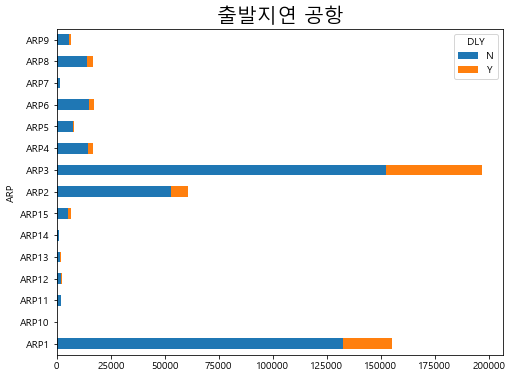

In [58]:
dep.pivot_table(index='ARP', columns='DLY', aggfunc='count', values='AOD').plot(kind='barh',
                                                                               stacked=True,
                                                                               figsize=(8,6))
plt.title('출발지연 공항', fontsize=20)

In [59]:
# 출발지연 사유
dep.pivot_table(index='DRR', columns='ARP', aggfunc='count', values='AOD')

ARP,ARP1,ARP10,ARP11,ARP12,ARP13,ARP14,ARP15,ARP2,ARP3,ARP4,ARP5,ARP6,ARP7,ARP8,ARP9
DRR,,,,,,,,,,,,,,,
A/C접속,19423.0,1.0,63.0,273.0,471.0,65.0,303.0,6715.0,42852.0,2197.0,477.0,2221.0,18.0,2512.0,536.0
A/C정비,564.0,NaN,6.0,9.0,4.0,1.0,35.0,159.0,425.0,17.0,27.0,45.0,6.0,17.0,12.0
Curfew,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SKD변경,11.0,NaN,NaN,NaN,NaN,NaN,1.0,17.0,7.0,NaN,NaN,3.0,NaN,NaN,NaN
강설,59.0,NaN,2.0,NaN,NaN,NaN,2.0,21.0,65.0,7.0,1.0,12.0,5.0,12.0,NaN
강우,7.0,NaN,NaN,2.0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
강풍,84.0,NaN,NaN,NaN,1.0,2.0,3.0,40.0,122.0,3.0,2.0,3.0,3.0,3.0,1.0
계류장혼잡,107.0,NaN,NaN,1.0,1.0,NaN,17.0,119.0,102.0,NaN,1.0,6.0,NaN,NaN,NaN
공항폐쇄,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# 도착지연
arr.pivot_table(index='ODP', columns='DLY', aggfunc='count', values='AOD')

DLY,N,Y
ODP,,
ARP1,144160.0,10291.0
ARP10,4.0,NaN
ARP11,1796.0,31.0
ARP12,2308.0,133.0
ARP13,1892.0,234.0
ARP14,904.0,44.0
ARP15,7445.0,754.0
ARP2,57309.0,3169.0
ARP3,182508.0,14305.0


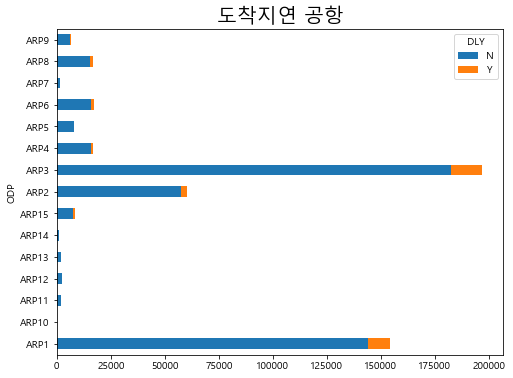

In [61]:
arr.pivot_table(index='ODP', columns='DLY', aggfunc='count', values='AOD').plot(kind='barh',
                                                                               stacked=True,
                                                                               figsize=(8,6))
plt.title('도착지연 공항', fontsize=20)

In [62]:
# 도착지연 사유
arr.pivot_table(index='DRR', columns='ODP', aggfunc='count', values='AOD')

ODP,ARP1,ARP11,ARP12,ARP13,ARP14,ARP15,ARP2,ARP3,ARP4,ARP5,ARP6,ARP7,ARP8,ARP9
DRR,,,,,,,,,,,,,,
A/C접속,8928.0,28.0,120.0,220.0,38.0,405.0,2823.0,13396.0,937.0,196.0,1138.0,23.0,1099.0,260.0
A/C정비,275.0,2.0,7.0,2.0,NaN,30.0,68.0,239.0,11.0,17.0,29.0,2.0,15.0,7.0
Curfew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SKD변경,4.0,NaN,NaN,NaN,NaN,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
강설,73.0,NaN,NaN,NaN,NaN,2.0,18.0,57.0,8.0,NaN,11.0,4.0,2.0,NaN
강우,5.0,NaN,1.0,NaN,NaN,1.0,1.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN
강풍,163.0,NaN,NaN,3.0,2.0,8.0,25.0,93.0,9.0,2.0,13.0,NaN,6.0,5.0
계류장혼잡,13.0,NaN,NaN,NaN,NaN,10.0,30.0,8.0,NaN,NaN,NaN,NaN,2.0,NaN
공항폐쇄,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
